In [1]:
from mne import read_epochs, set_eeg_reference
from mne.preprocessing import ICA, EOGRegression
import numpy as np
from mne.viz import plot_ica_components
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

Load and Preprocessing

In [3]:
import sys
sys.path.append('../../preprocessing')
from load_data import load_raw_to_epochs, get_channel_types

load_raw_to_epochs('mld.bdf', True)

Extracting EDF parameters from C:\Users\Alberto\Documents\BCI\data\mld\mld.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2047  =      0.000 ...     1.000 secs...
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 13517 samples (6.600 sec)

Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)


C:\Users\Alberto\Documents\BCI\data\mld\../../preprocessing\load_data.py:35: RuntimeWarning: DigMontage is only a subset of info. There are 8 channel positions not present in the DigMontage. The required channels are:

['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw.set_montage(montage, on_missing='warn')
C:\Users\Alberto\Documents\BCI\data\mld\../../preprocessing\load_data.py:37: RuntimeWarning: filter_length (13517) is longer than the signal (2048), distortion is likely. Reduce filter length or filter a longer signal.
  raw = raw.notch_filter(arange(50,251,50), n_jobs=8)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:    0.0s finished


ValueError: zero-size array to reduction operation maximum which has no identity

In [3]:
raw = read_epochs('raw_epo.fif')

Reading C:\Users\Alberto\Documents\BCI\data\fit\raw_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
89 matching events found
No baseline correction applied
0 projection items activated


Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1528 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 6068 tasks      | elapsed:    6.1s
[Parallel(n_jobs=8)]: Done 6408 out of 6408 | elapsed:    6.4s finished


Using matplotlib as 2D backend.


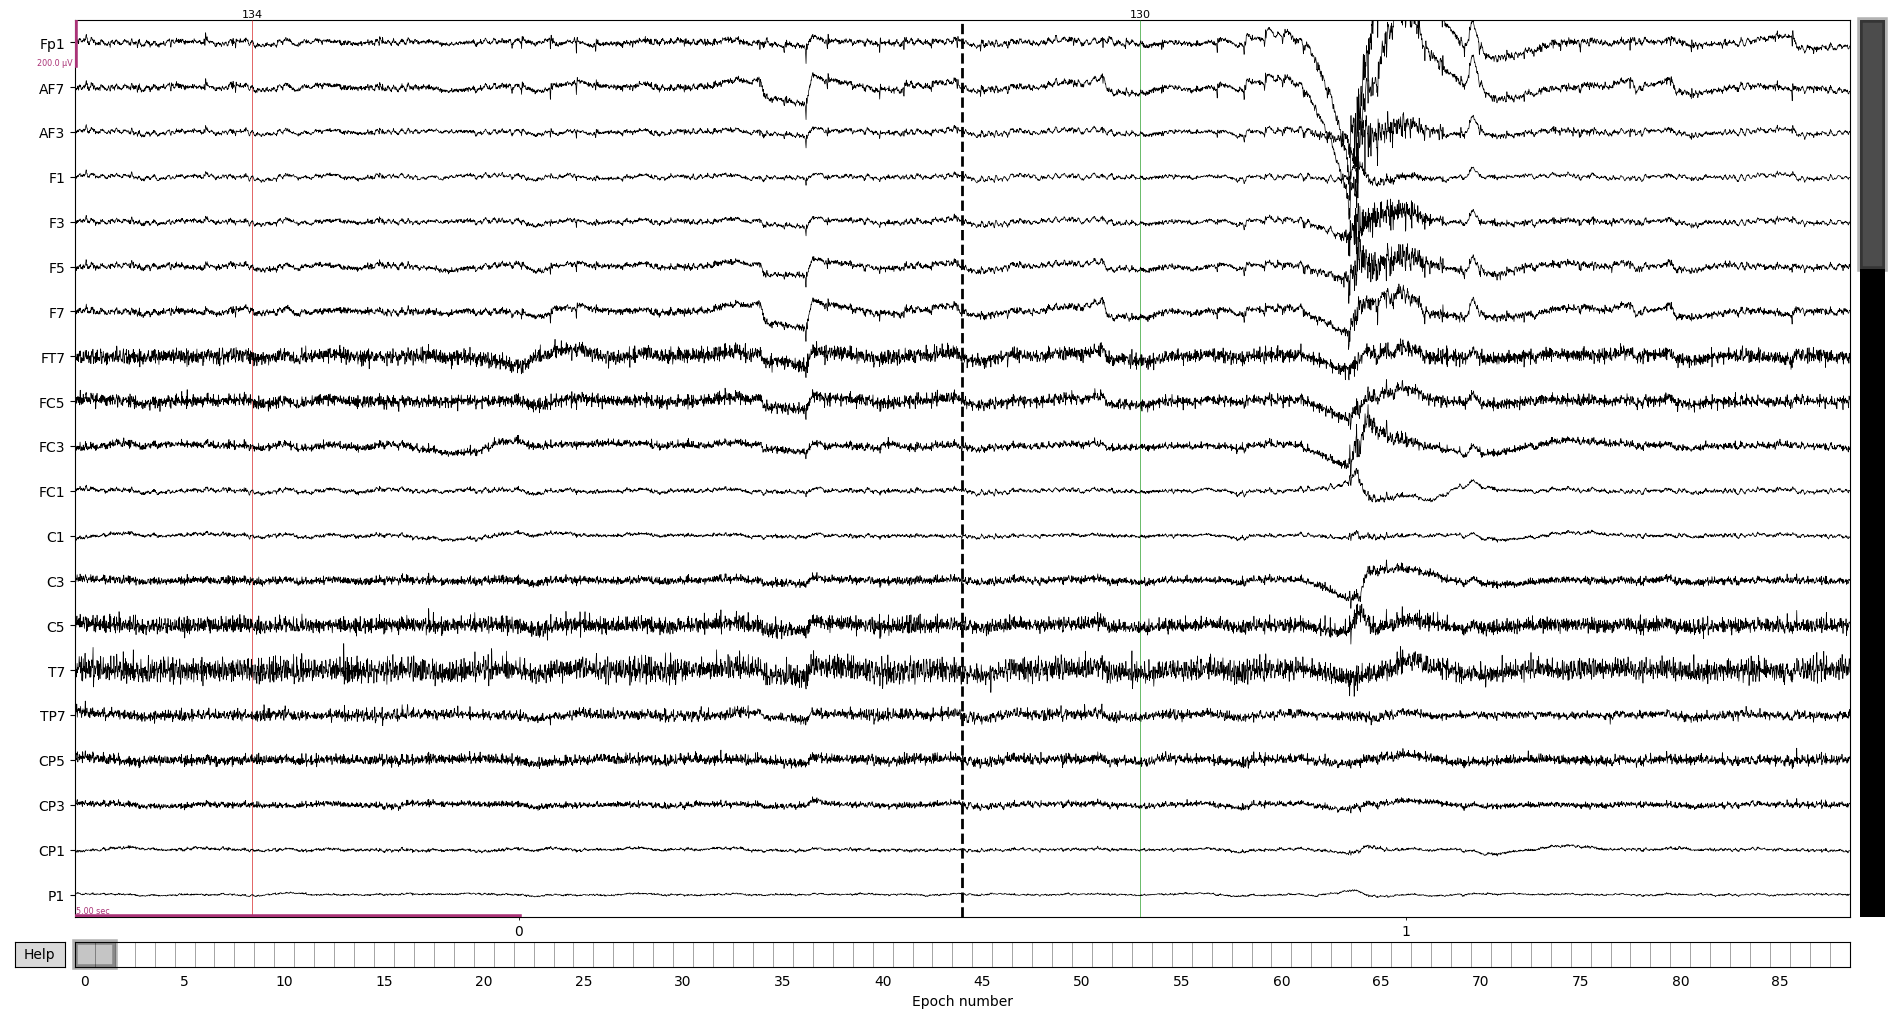

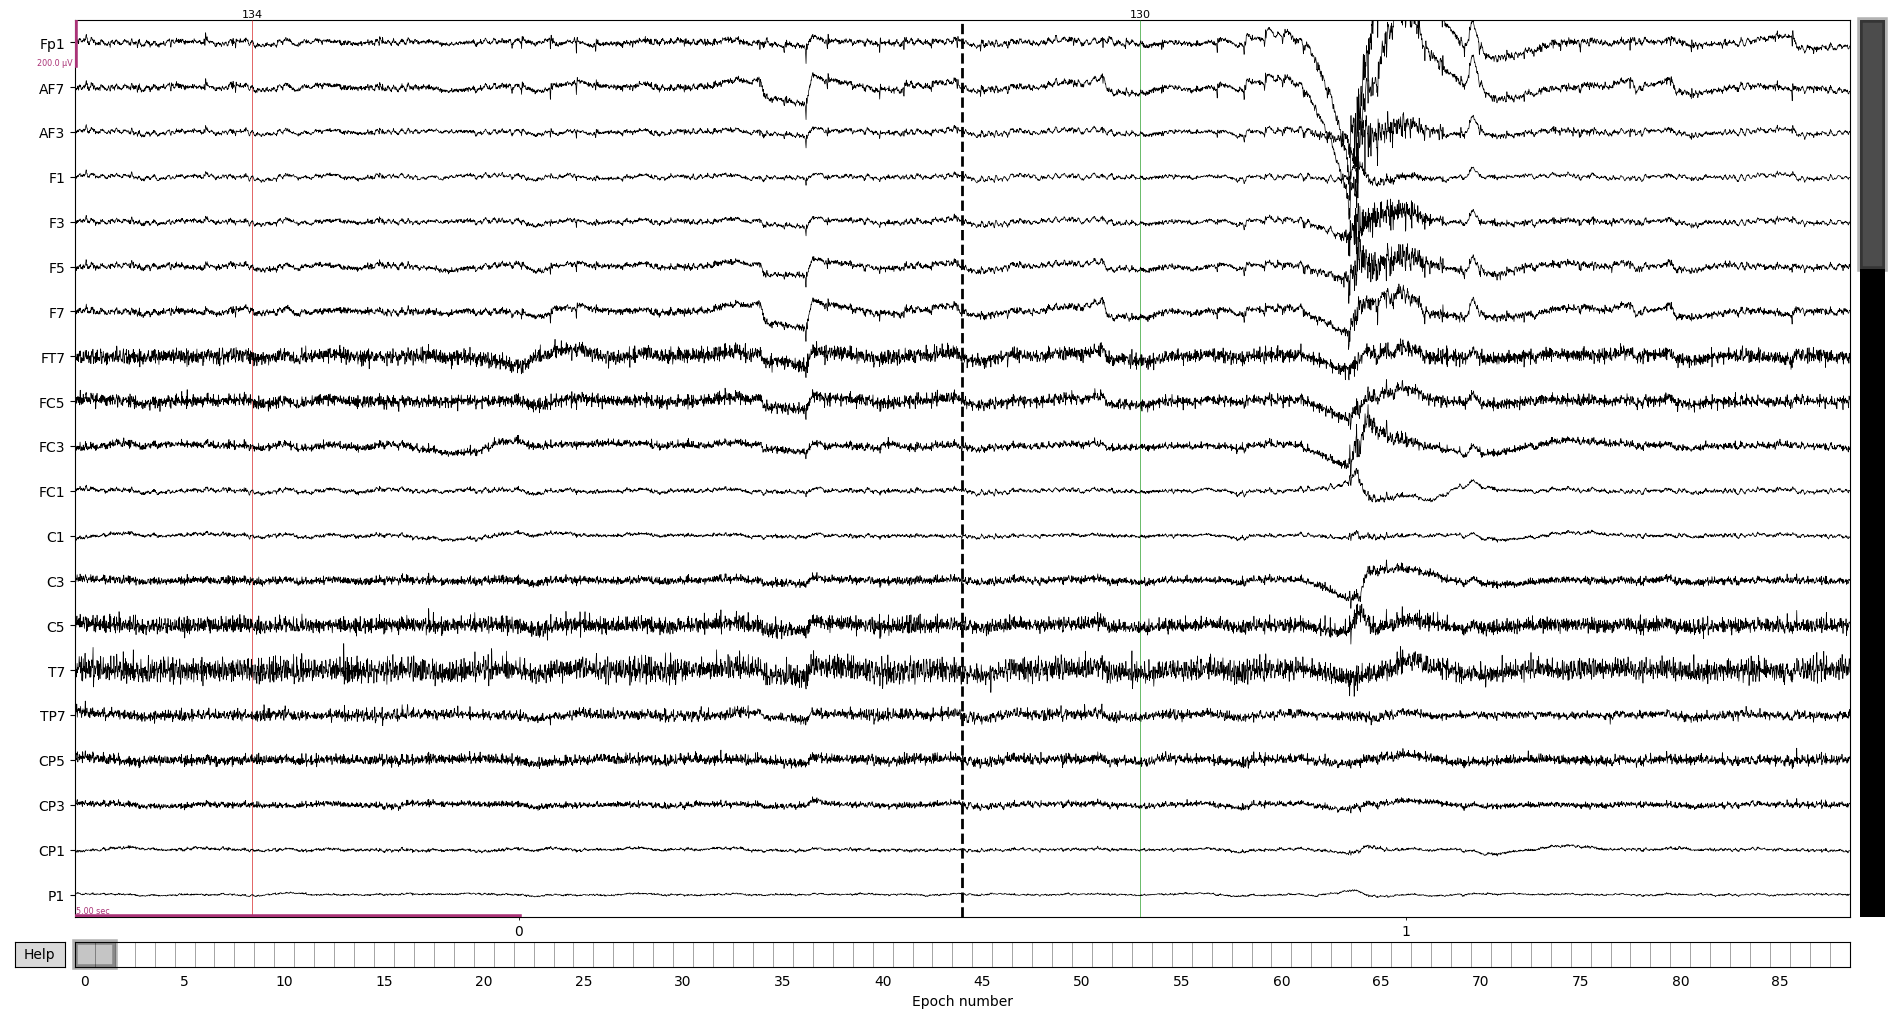

In [4]:
raw.copy().filter(1,120, n_jobs=8).plot(n_channels=20, n_epochs=2, scalings=10e-5, events=raw.events, picks=['eeg','eog'])

Marking bad chanels

In [5]:
bads = ['EXG5', 'EXG7', 'T7']
raw.info['bads'] = bads
raw.drop([1, 28, 49, 50, 71, 79, 81])

Dropped 7 epochs: 1, 28, 49, 50, 71, 79, 81


<EpochsFIF |  82 events (all good), -2 - 7.99902 sec, baseline off, ~467.8 MB, data loaded,
 'r_pinch': 20
 'r_stop': 17
 'left': 16
 'right': 18
 'rest': 11>

Referencing

In [6]:
referenced = set_eeg_reference(raw,ref_channels='average')[0]
del raw

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


set channel types

In [7]:
referenced.set_channel_types(get_channel_types())

<EpochsFIF |  82 events (all good), -2 - 7.99902 sec, baseline off, ~467.8 MB, data loaded,
 'r_pinch': 20
 'r_stop': 17
 'left': 16
 'right': 18
 'rest': 11>

Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 520 tasks      | elapsed:    3.6s
[Parallel(n_jobs=8)]: Done 4957 tasks      | elapsed:    7.7s
[Parallel(n_jobs=8)]: Done 5248 out of 5248 | elapsed:    8.0s finished


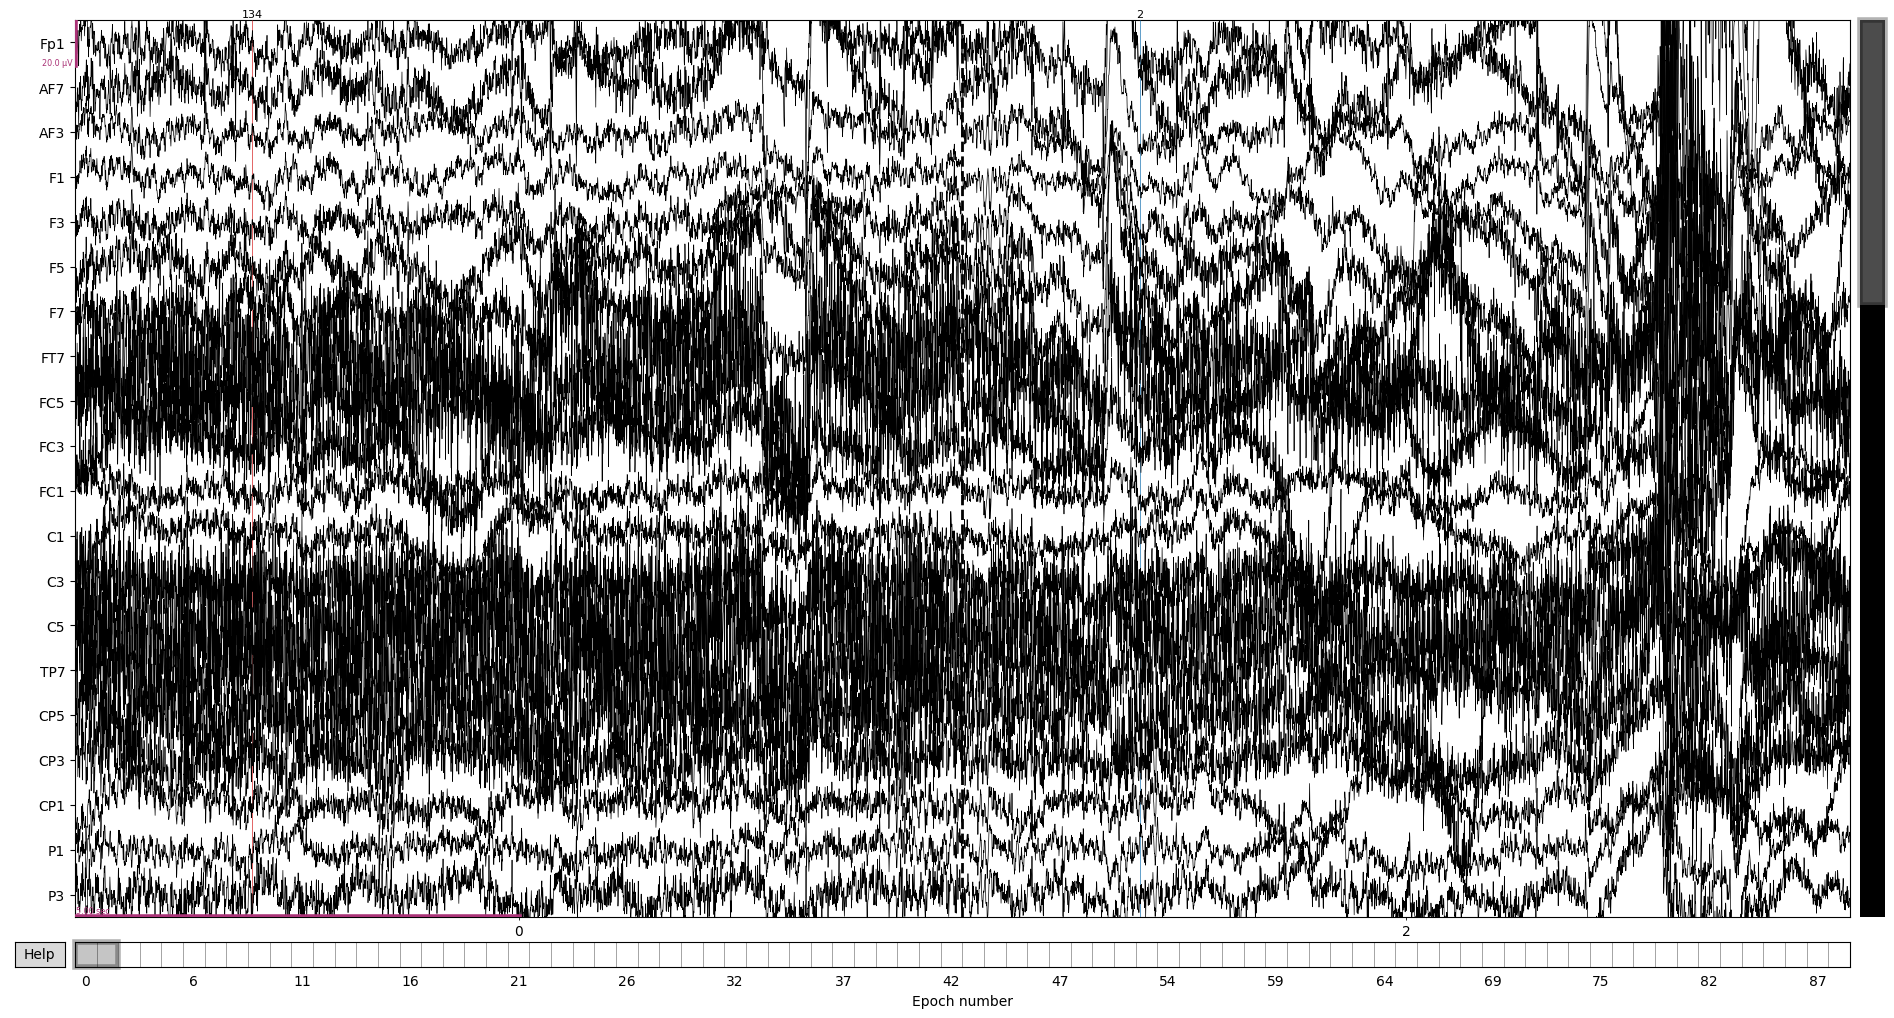

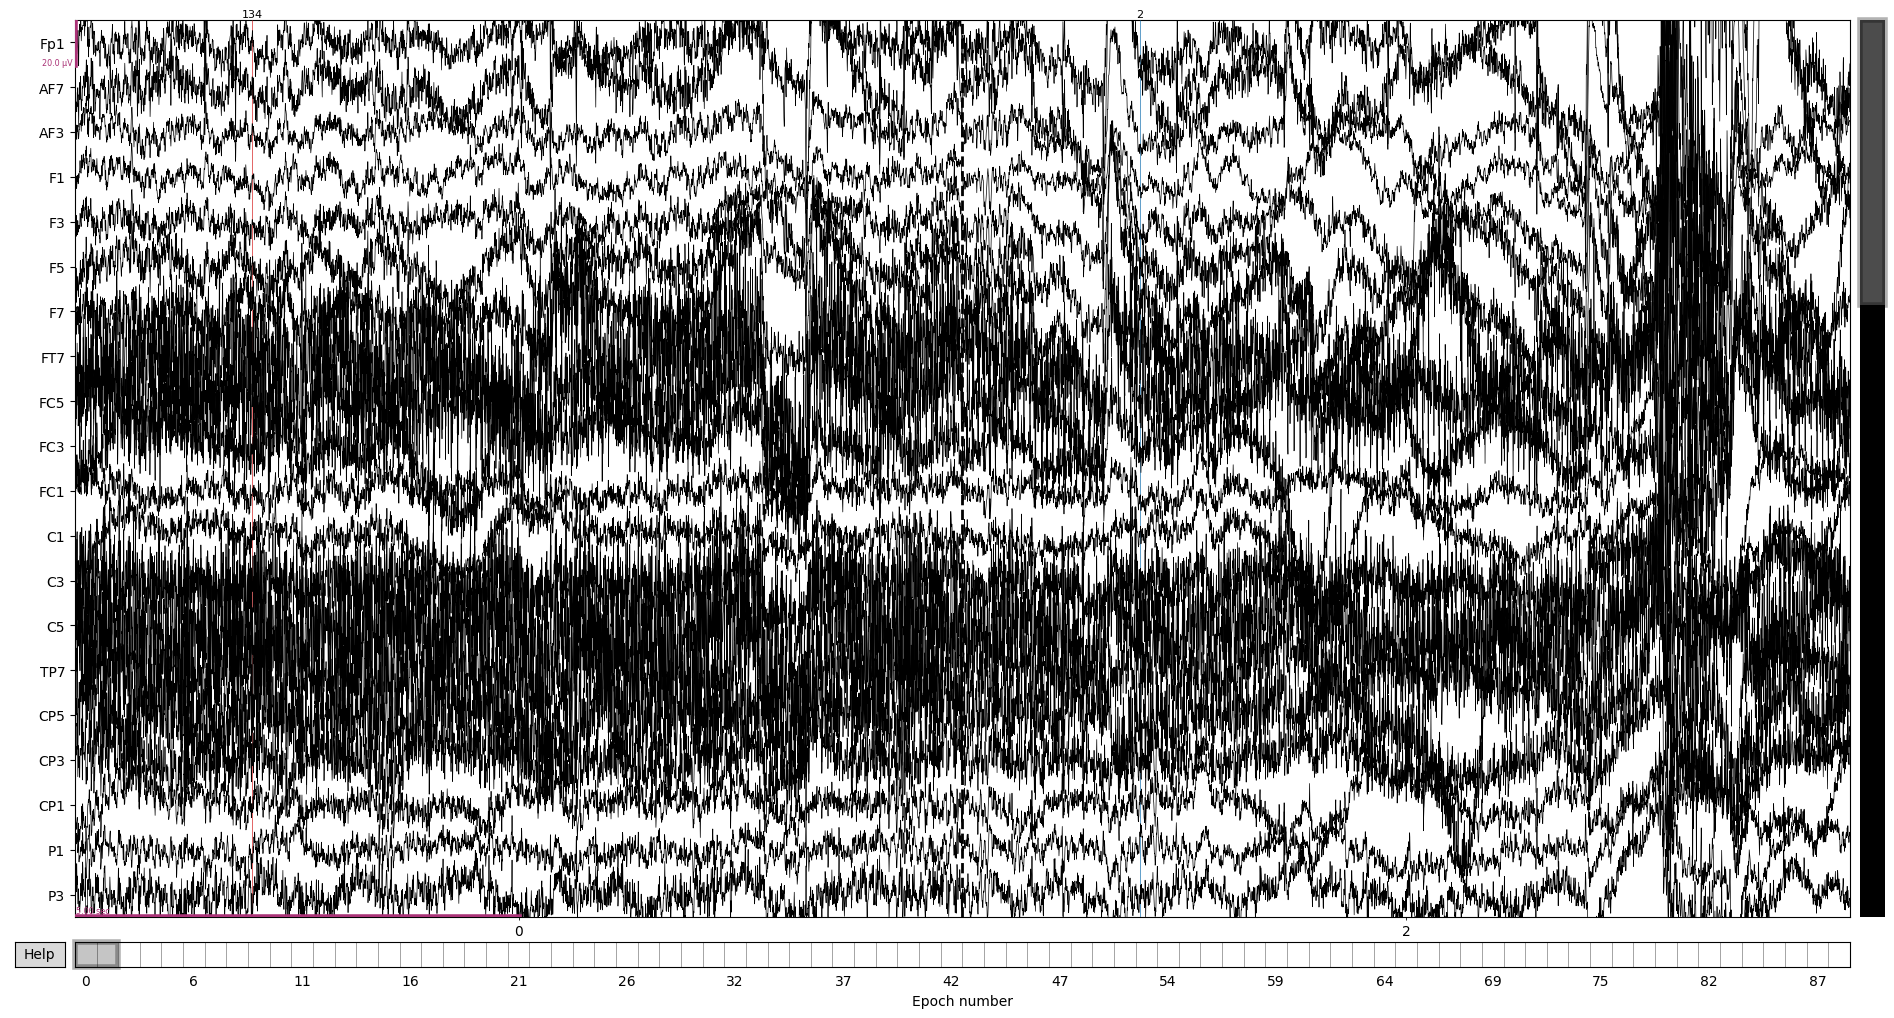

In [8]:
referenced.copy().filter(1,120, n_jobs=8).plot(n_channels=20, n_epochs=2, scalings=10e-6, events=referenced.events, picks=['eeg','eog'])

In [10]:
referenced.save('referenced_epo.fif', overwrite=True)
del referenced

NameError: name 'referenced' is not defined

REMOVE ARTIFACTS


In [11]:
epochs = read_epochs('referenced_epo.fif')
epochs.drop([0, 2, 47, 54, 55, 57, 66])

Reading C:\Users\Alberto\Documents\BCI\data\fit\referenced_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
82 matching events found
No baseline correction applied
0 projection items activated
Dropped 7 epochs: 0, 2, 47, 54, 55, 57, 66


<EpochsFIF |  75 events (all good), -2 - 7.99902 sec, baseline off, ~427.8 MB, data loaded,
 'r_pinch': 18
 'r_stop': 16
 'left': 16
 'right': 14
 'rest': 11>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


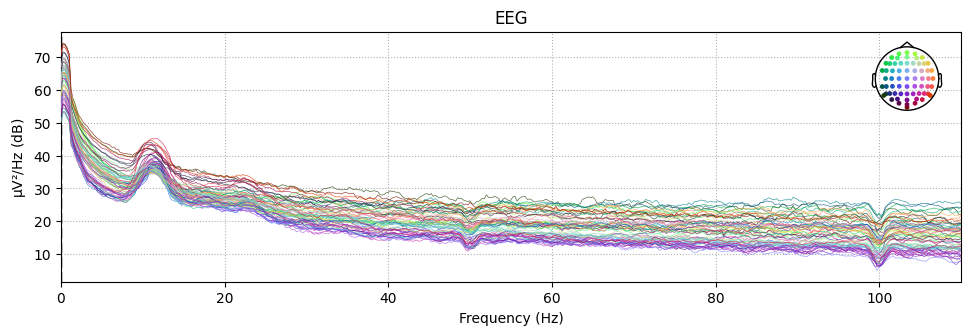

In [12]:
epochs['right'].plot_psd(fmax=110, tmin=0, tmax=4)

EOG Regression

No projector specified for this dataset. Please consider the method self.add_proj.


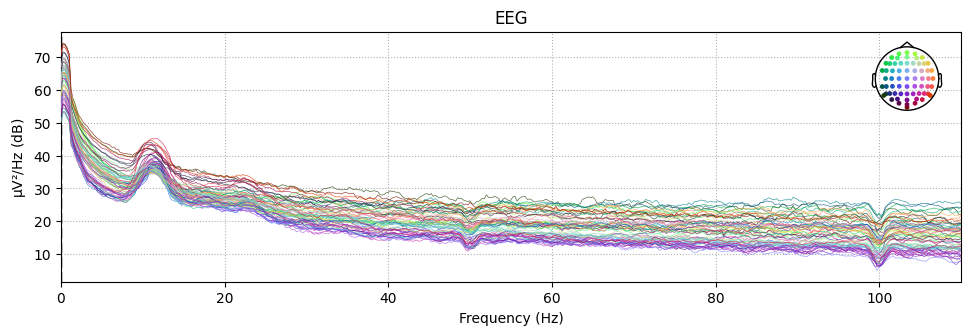

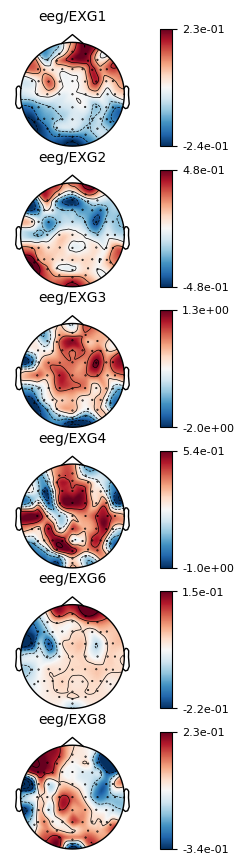

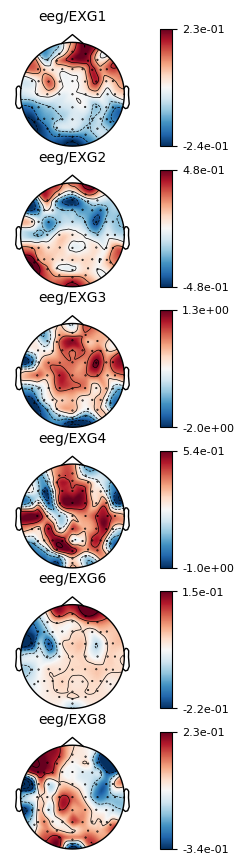

In [13]:
regressor = EOGRegression(
    picks='eeg', picks_artifact=['EXG1','EXG2','EXG3','EXG4','EXG6','EXG8']).fit(epochs)
regressor.plot()

In [14]:
ICA

mne.preprocessing.ica.ICA

In [15]:
filtered = epochs.copy().filter(1,120, n_jobs=8)
filtered.apply_baseline((-1.4,-0.1))
filtered.crop(-0.5,2)
ica = ICA(n_components=10, method='picard')
ica.fit(filtered)

Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 167 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 4466 tasks      | elapsed:    6.6s
[Parallel(n_jobs=8)]: Done 4800 out of 4800 | elapsed:    6.8s finished


Applying baseline correction (mode: mean)
Fitting ICA to data using 63 channels (please be patient, this may take a while)


C:\Users\Alberto\AppData\Local\Temp\ipykernel_11744\79998668.py:5: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(filtered)


Selecting by number: 10 components
Fitting ICA took 7.9s.


<ICA | epochs decomposition, method: picard (fit in 48 iterations on 192075 samples), 10 ICA components (63 PCA components available), channel types: eeg, no sources marked for exclusion>

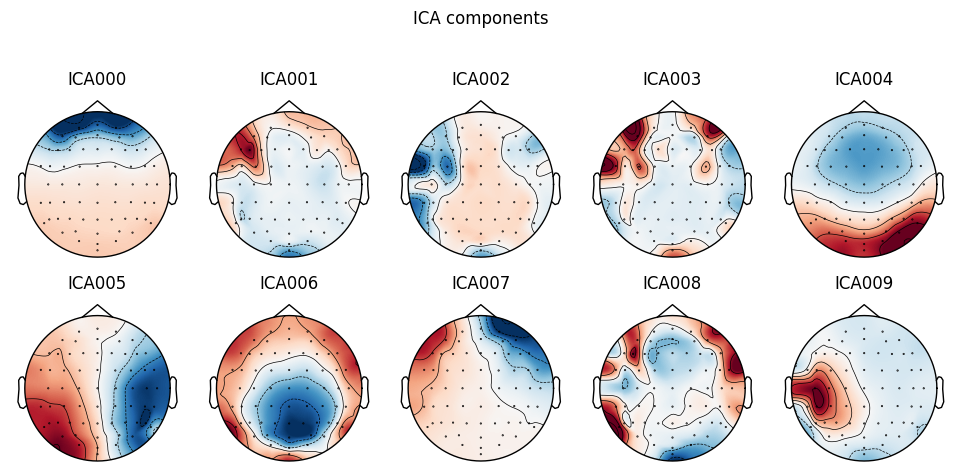

[<MNEFigure size 975x496 with 10 Axes>]

In [16]:
plot_ica_components(ica)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_11744\4173073552.py:2: RuntimeWarning: filter_length (3381) is longer than the signal (1946), distortion is likely. Reduce filter length or filter a longer signal.
  epochs['left','right'].copy().crop(-0.1,1.8).filter(1,120, verbose=False),


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection i

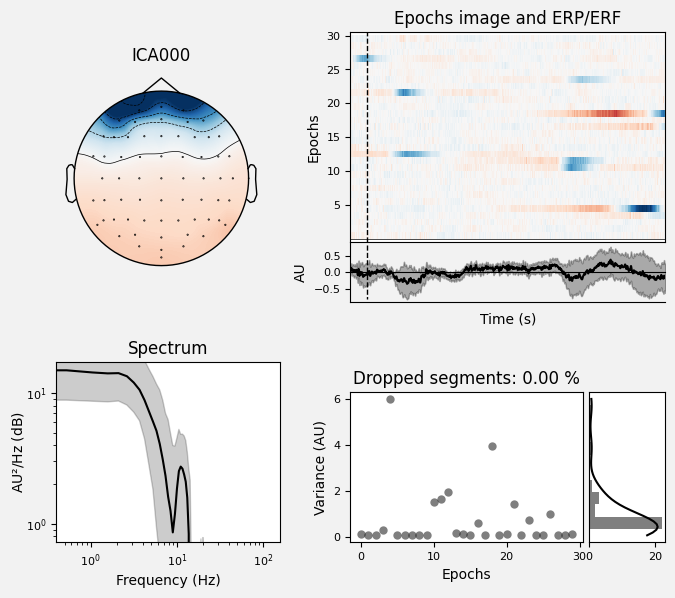

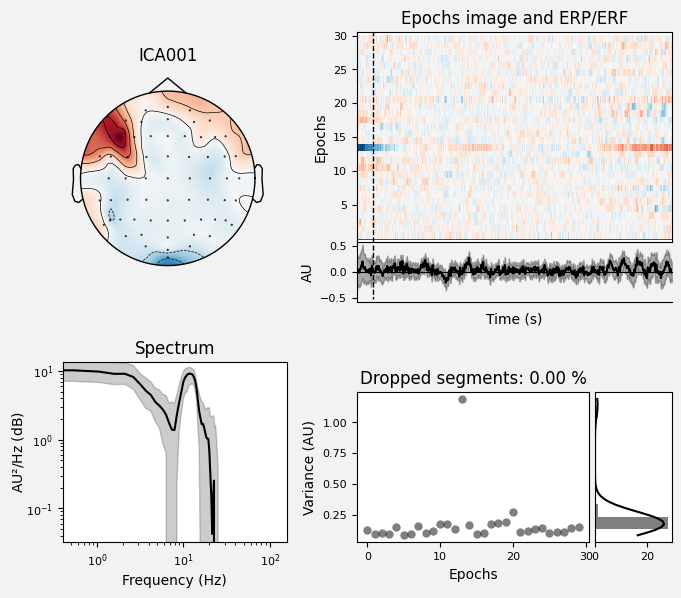

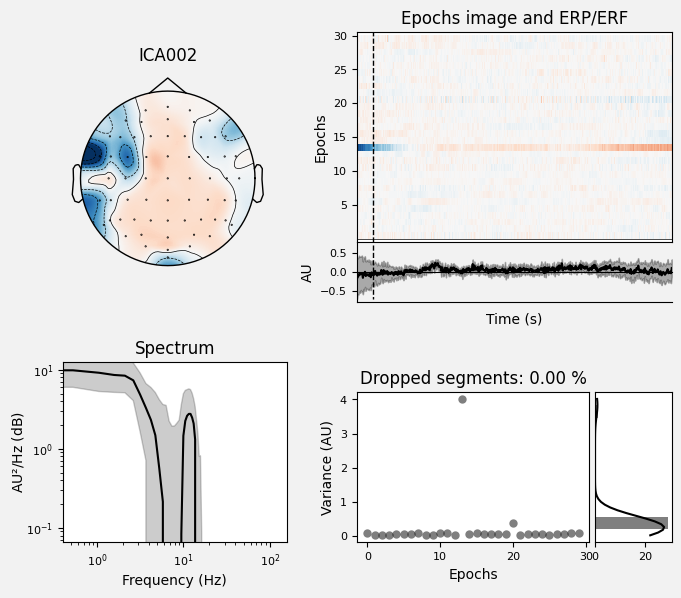

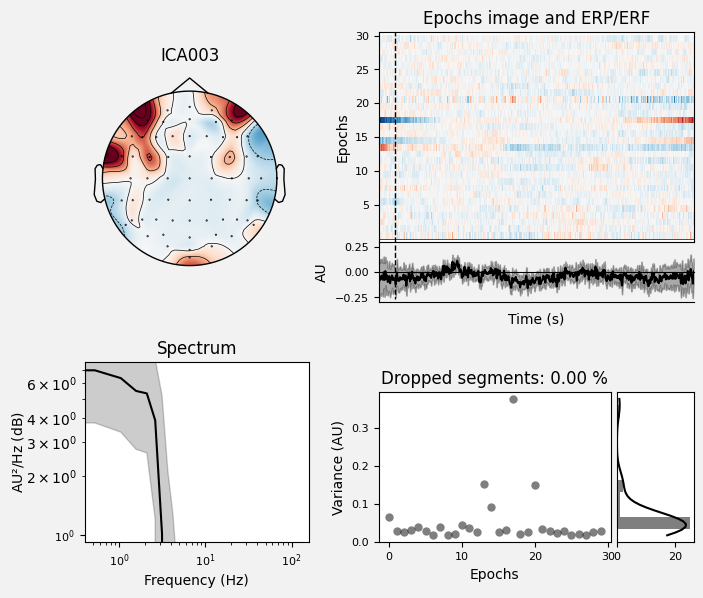

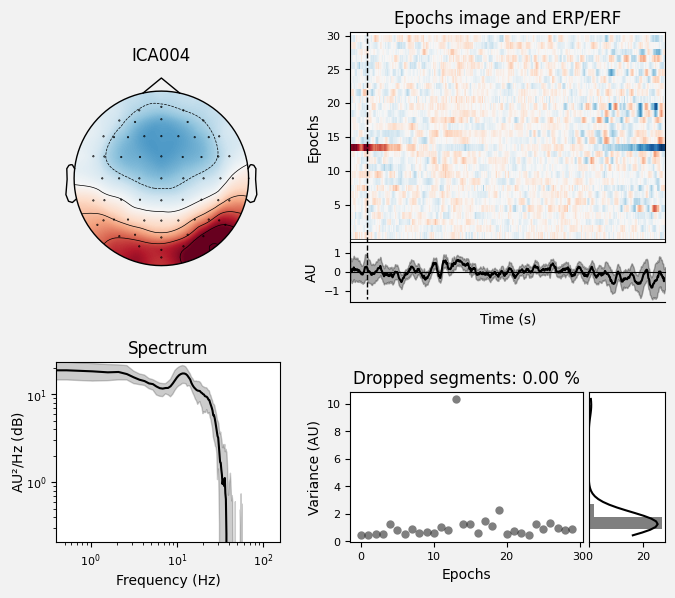

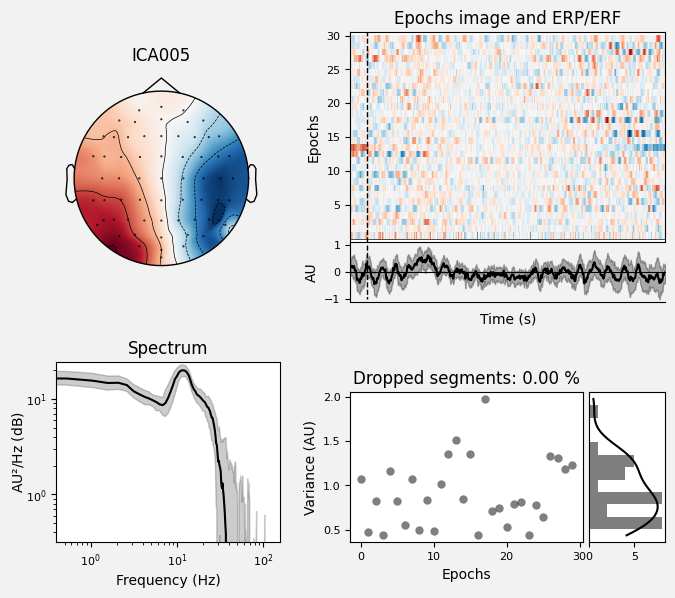

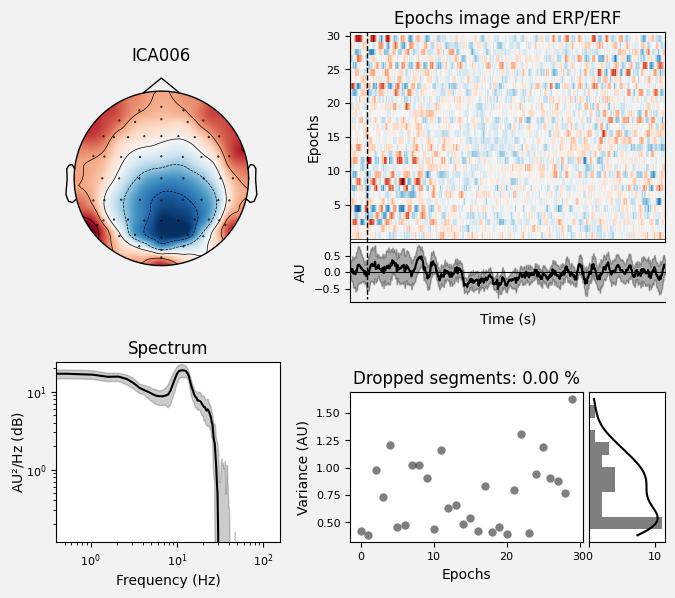

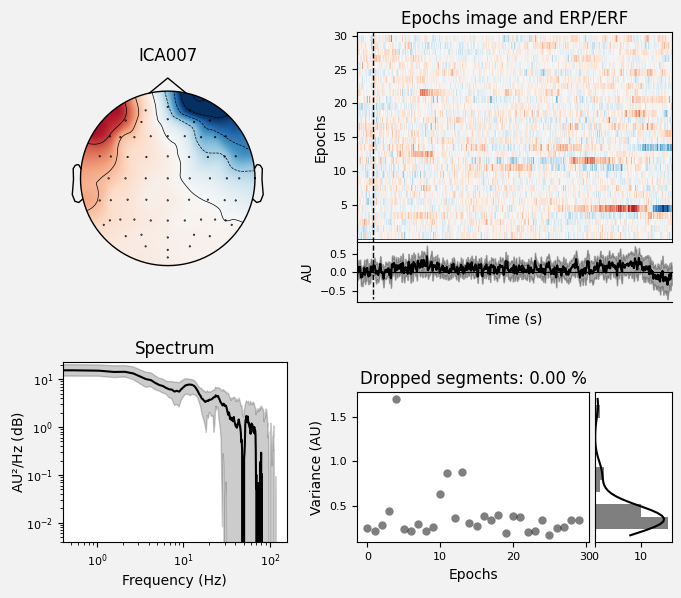

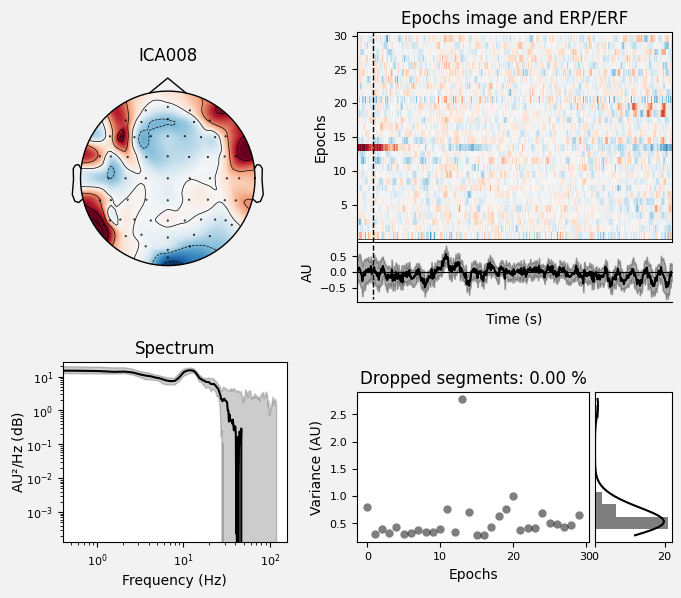

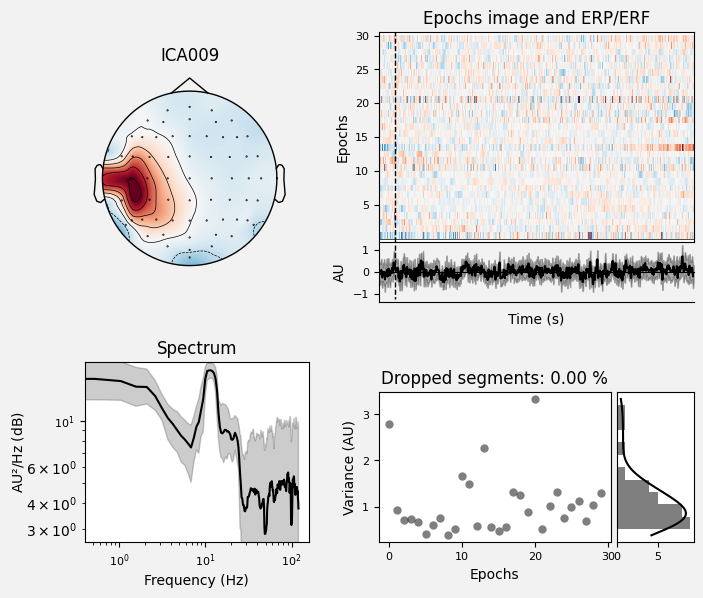

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [18]:
ica.plot_properties(
    epochs['left','right'].copy().crop(-0.1,1.8).filter(1,120, verbose=False), 
    picks = [0,1,2,3,4,5,6,7,8,9], 
    log_scale = True,
    psd_args = dict(fmax=120))

In [21]:
eog_indices, eog_scores = ica.find_bads_eog(
    filtered['r_pinch'],
    ch_name=['EXG1','EXG2','EXG3','EXG4','EXG6','EXG8'], 
    measure='zscore',
    threshold=2)


Using EOG channels: EXG1, EXG2, EXG3, EXG4, EXG6, EXG8


In [29]:
eog_indices


[7, 6, 0, 1]

In [30]:
emg_indices, emg_scores = ica.find_bads_muscle(filtered['r_pinch'])

    Using multitaper spectrum estimation with 7 DPSS windows


AssertionError: 

In [31]:
ica.apply(epochs, exclude=np.unique([0,7]))

Applying ICA to Epochs instance
    Transforming to ICA space (10 components)
    Zeroing out 2 ICA components
    Projecting back using 63 PCA components


<EpochsFIF |  75 events (all good), -2 - 7.99902 sec, baseline off, ~427.8 MB, data loaded,
 'r_pinch': 18
 'r_stop': 16
 'left': 16
 'right': 14
 'rest': 11>

ERP

Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



C:\Users\Alberto\AppData\Local\Temp\ipykernel_11744\3154141180.py:1: RuntimeWarning: filter_length (3381) is longer than the signal (3073), distortion is likely. Reduce filter length or filter a longer signal.
  epochs['left','right'].copy().crop(-1,2).filter(1,120, n_jobs=8).average().plot()
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    3.4s
[Parallel(n_jobs=8)]: Done 1920 out of 1920 | elapsed:    4.3s finished


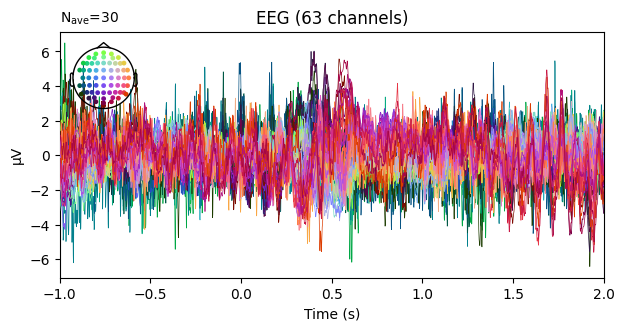

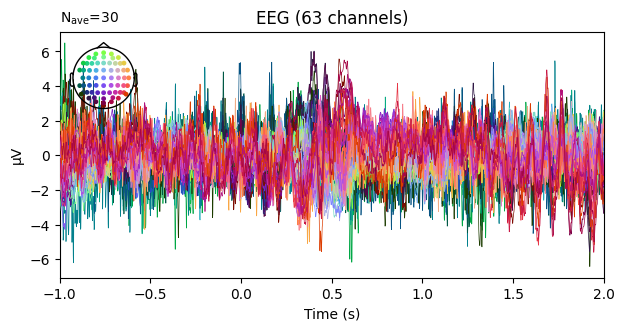

In [32]:
epochs['left','right'].copy().crop(-1,2).filter(1,120, n_jobs=8).average().plot()

Setting up band-pass filter from 2 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 1691 samples (1.651 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 536 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 704 out of 704 | elapsed:    0.2s finished


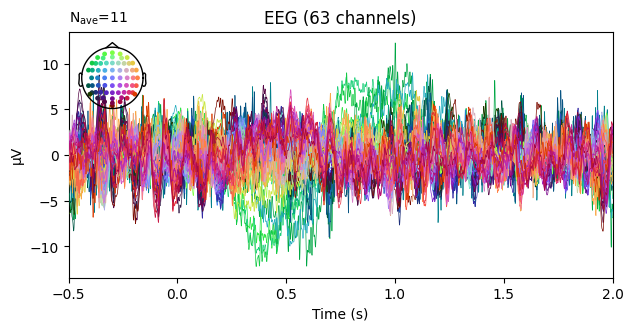

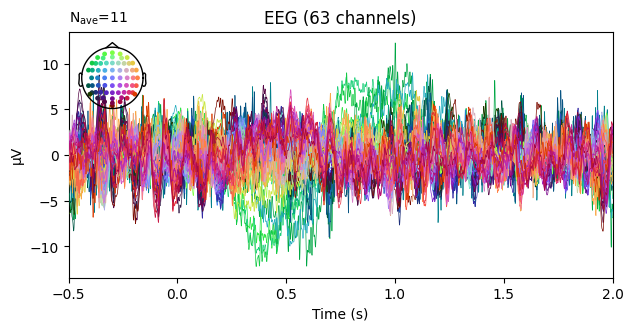

In [33]:
epochs['rest'].copy().crop(-0.5,2).filter(2,120, n_jobs=8).average().plot()

In [34]:
epochs.save('ica_epo.fif', overwrite=True)

In [45]:
epochs

<EpochsFIF |  55 events (all good), -2 - 7.99902 sec, baseline off, ~313.8 MB, data loaded,
 'r_pinch': 11
 'r_stop': 14
 'left': 13
 'right': 12
 'rest': 5>